## Osman Dolu

### Technical challenge: Data Scientist

**The challenge**

You are given a dataset (assets/dataset.zip) containing information about restaurants all over Europe. The goal of the challenge is to make sense of the dataset and understand it in such a way that informed, data-based business decisions can be made. To make things easier, the challenge is split into three conceptually independent parts, with action points at each part. 

**Data cleaning**
1.	Identify the columns with mixed data types.
2.	For each column, count the number of rows per data type.
3.	Would removing missing values solve the mixed data type problem?

**Data understanding**

1.	Are the review columns correlated with the rating columns? 
●	Review columns: ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
●	Rating columns: ["food", "service", "value", "atmosphere", "avg_rating"]
2.	Are vegetarian-friendly restaurants better than non-vegetarian ones?
3.	Are there any significantly more expensive cuisines?

**Business-specific**

1.	In the assets directory, you will see a very small dataset called europe_capitals_population_and_area.csv. A gluten-free restaurant wants to open a new restaurant in a European capital where gluten-free restaurants are underrepresented. Assuming there are no other factors, except population and gluten-free restaurant density, what would be the top 5 capitals to open that restaurant?
2.	Think and propose a couple of other ways this dataset could be used to help businesses.


**Bonus**

1.	In the assets directory, you will see a file called paris_bounding_polygon.json. This contains a list of latitude and longitude coordinates that define a polygon that is considered to represent the Paris city area. For simplicity, we assume the population distribution is uniform in the Paris city area. An Italian restaurant wants to open a restaurant in Paris in a zone where there are the fewest Italian restaurants. What is the best location to open the restaurant (the answer can be a single point or a bounding box/polygonal region depending on the implementation)?

**Delivering the solution**

●	Create a GitHub repository for the solution;
●	For each action point, create a separate commit (or multiple commits if the action point requires);
●	Keep in mind that notebook cells should contain relevant output;
●	After finishing the challenge, make sure to add us as collaborators to the repository.

**Timeline**

●	The challenge should be completed between 4-6 hours.
●	It is a bonus if you can finish it in a single day.
●	If you can not finish in a single day, you can split the work into two days, but please have continuity (if you do not finish the first day, please continue the second morning).


**Things to consider**

●	It's great if you manage to cover all the action points in the given time period, but we'll also pay attention to the following:
○	how was the data analyzed;
○	how were hypotheses defined;
○	what techniques were used in order to validate/invalidate hypotheses;
○	how were the corresponding conclusions/findings presented (they should be clear, interpretable, and relevant)
●	Code quality, correctness, performance


Good luck! 🧑‍💻


### Importing Necessary Libraries

In [534]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import scipy
from scipy import stats
from scipy.stats.stats import pearsonr

# Set it to None to display ALL columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

import warnings
# Suppressing a warning 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")


### Loading Dataset


In [535]:
df_dataset = pd.read_csv("dataset.csv")
df_dataset.head(3).T

,0,1,2
restaurant_link,g10001637-d10002227,g10001637-d14975787,g10002858-d4586832
restaurant_name,Le 147,Le Saint Jouvent,Au Bout du Pont
original_location,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...","[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...","[""Europe"", ""France"", ""Centre-Val de Loire"", ""B..."
country,France,France,France
region,Nouvelle-Aquitaine,Nouvelle-Aquitaine,Centre-Val de Loire
province,Haute-Vienne,Haute-Vienne,Berry
city,Saint-Jouvent,Saint-Jouvent,Rivarennes
address,"10 Maison Neuve, 87510 Saint-Jouvent France","16 Place de l Eglise, 87510 Saint-Jouvent France","2 rue des Dames, 36800 Rivarennes France"
latitude,45.961674,45.95704,46.635895
longitude,1.169131,1.20548,1.386133


### Data cleaning

#### Identify the columns with mixed data types

In [536]:
df_dataset.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.0,36.0,English,2.0,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,Cheap Eats,€,NaN,NaN,NaN,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,4.0,5.0,All languages,5.0,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,"Cheap Eats, French, European",€,NaN,"Dinner, Lunch, Drinks","French, European",NaN,"Reservations, Seating, Table Service, Wheelcha...",N,N,N,NaN,NaN,NaN,NaN,5.0,13.0,English,4.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Serves Alcohol, Table S...",N,N,N,NaN,NaN,NaN,NaN,4.0,34.0,English,1.0,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,"Mid-range, French",€€-€€€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N,NaN,NaN,NaN,NaN,4.5,11.0,All languages,11.0,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [537]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

The columns with object data type are prime suspects for containing mixed data type content. Therefore, we will check if a column has more than one data type with the following code:

In [538]:
df = df_dataset

mixed_col_list = []

for col in df.columns:
    mixed = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[mixed]) > 0:
        mixed_col_list.append(col)

print(mixed_col_list)

['region', 'province', 'city', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'original_open_hours', 'default_language', 'keywords']


#### For each column, count the number of rows per data type.

To solve this problem, we will first create a new dataset with cell data type. Then, we display the value counts of data types for each column. Here is the answer:

In [539]:
data_type = df[mixed_col_list].applymap(type)

for i in data_type.columns:
    display(data_type[i].value_counts())


<class 'str'>      1033074
<class 'float'>      50323
Name: region, dtype: int64

<class 'str'>      742765
<class 'float'>    340632
Name: province, dtype: int64

<class 'str'>      682712
<class 'float'>    400685
Name: city, dtype: int64

<class 'str'>      1081555
<class 'float'>       1842
Name: claimed, dtype: int64

<class 'float'>    820264
<class 'str'>      263133
Name: awards, dtype: int64

<class 'str'>      988409
<class 'float'>     94988
Name: popularity_detailed, dtype: int64

<class 'str'>      985605
<class 'float'>     97792
Name: popularity_generic, dtype: int64

<class 'str'>      972763
<class 'float'>    110634
Name: top_tags, dtype: int64

<class 'str'>      806192
<class 'float'>    277205
Name: price_level, dtype: int64

<class 'float'>    779070
<class 'str'>      304327
Name: price_range, dtype: int64

<class 'str'>      635347
<class 'float'>    448050
Name: meals, dtype: int64

<class 'str'>      914294
<class 'float'>    169103
Name: cuisines, dtype: int64

<class 'float'>    743141
<class 'str'>      340256
Name: special_diets, dtype: int64

<class 'float'>    765990
<class 'str'>      317407
Name: features, dtype: int64

<class 'str'>      593832
<class 'float'>    489565
Name: original_open_hours, dtype: int64

<class 'str'>      988204
<class 'float'>     95193
Name: default_language, dtype: int64

<class 'float'>    984199
<class 'str'>       99198
Name: keywords, dtype: int64

#### Would removing missing values solve the mixed data type problem?

First of all, we need to be careful when we decide to remove missing values from a dataset because it might cause a signifnicant amount of data. However, since the task asks us to check if removing missing values would solve the mixed data type problem, we will drop all the missing values and check if the problem is solved. 

In [540]:
df1 = df_dataset.dropna()

In [541]:
df1.isnull().sum().sum()

0

In [542]:
df_dataset.shape, df1.shape

((1083397, 42), (2177, 42))

Now, we have no missing values in the dataset. However, the new dataset has lost a lot of data points. See shape values above.

In [543]:
df = df1

mixed_col_list = []

for col in df.columns:
    mixed = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[mixed]) > 0:
        mixed_col_list.append(col)

print(mixed_col_list)

[]


This empty list tells us that removing missing values has resolved the mixed data type problem.

### Data understanding


#### Are the review columns correlated with the rating columns? 
* Review columns: ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]

* Rating columns: ["food", "service", "value", "atmosphere", "avg_rating"]


In order to test whether the review columns are correlated with the rating columns, I will use Pearson's Correlation Test. The Pearson correlation coefficient, also known as Pearson's r, is a measure of the linear correlation between two columns/variables/features. It ranges from -1 to 1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and 1 indicating a perfect positive correlation. The Pearson correlation measures the strength and direction of a linear relationship between two variables, and it can be used to determine how closely the two variables are related.

First, I will create a seperate dataframe that includes only the review and rating columns to prevent clutter on our screen.

In [544]:
df_rev_rating = df_dataset[["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language", "food", "service", "value", "atmosphere", "avg_rating"]]
df_rev_rating

,excellent,very_good,average,poor,terrible,total_reviews_count,reviews_count_in_default_language,food,service,value,atmosphere,avg_rating
0,2.0,0.0,0.0,0.0,0.0,36.0,2.0,4.0,4.5,4.0,NaN,4.0
1,2.0,2.0,1.0,0.0,0.0,5.0,5.0,NaN,NaN,NaN,NaN,4.0
2,3.0,1.0,0.0,0.0,0.0,13.0,4.0,NaN,NaN,NaN,NaN,5.0
3,1.0,0.0,0.0,0.0,0.0,34.0,1.0,4.5,4.5,4.5,NaN,4.0
4,4.0,7.0,0.0,0.0,0.0,11.0,11.0,4.5,4.5,4.5,NaN,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,0.0,0.0,0.0,0.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,2.5
1083393,0.0,1.0,1.0,1.0,2.0,6.0,5.0,NaN,NaN,NaN,NaN,2.0
1083394,1.0,0.0,0.0,0.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3.0
1083395,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [545]:
df_rev_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
excellent,988204.0,24.653440,89.850801,0.0,1.0,3.0,13.0,9383.0
very_good,988204.0,10.490516,35.512256,0.0,0.0,2.0,6.0,4091.0
average,988204.0,4.109302,15.669631,0.0,0.0,1.0,2.0,2132.0
poor,988204.0,2.355306,9.352756,0.0,0.0,0.0,1.0,1253.0
terrible,988204.0,2.954850,11.030069,0.0,0.0,0.0,2.0,1215.0
total_reviews_count,1031162.0,102.888989,267.241480,0.0,6.0,24.0,93.0,52404.0
reviews_count_in_default_language,988204.0,44.563415,148.728179,1.0,2.0,7.0,26.0,15229.0
food,599325.0,4.104179,0.564208,1.0,4.0,4.0,4.5,5.0
service,604287.0,4.067245,0.581267,1.0,4.0,4.0,4.5,5.0
value,602692.0,3.982897,0.577605,1.0,3.5,4.0,4.5,5.0


**Correlation Test**

In [546]:
df_rev_rating.corr().iloc[:7,7:]

,food,service,value,atmosphere,avg_rating
excellent,0.128760,0.134771,0.099463,0.167081,0.093861
very_good,0.016350,0.020838,-0.010068,0.067123,0.011779
average,-0.060098,-0.051280,-0.083435,-0.014837,-0.043494
poor,-0.103778,-0.093287,-0.125787,-0.057878,-0.076040
terrible,-0.190457,-0.181710,-0.195707,-0.139057,-0.155270
total_reviews_count,0.056542,0.037101,-0.005211,0.093915,0.036336
reviews_count_in_default_language,0.054864,0.061827,0.026536,0.100821,0.038642


A common threshold for determining statistical significance is an alpha level of 0.05. With this level, a correlation coefficient of 0.1 or greater might be considered a weak correlation, a correlation coefficient of 0.3 or greater would be considered a moderate correlation, and a correlation coefficient of 0.5 or greater would be considered a strong correlation.

In the correlation matrix above, we see that only some of the rating columns are weakly correlated with review colums and the rest of the columns are not correlated at all. 

<AxesSubplot:>

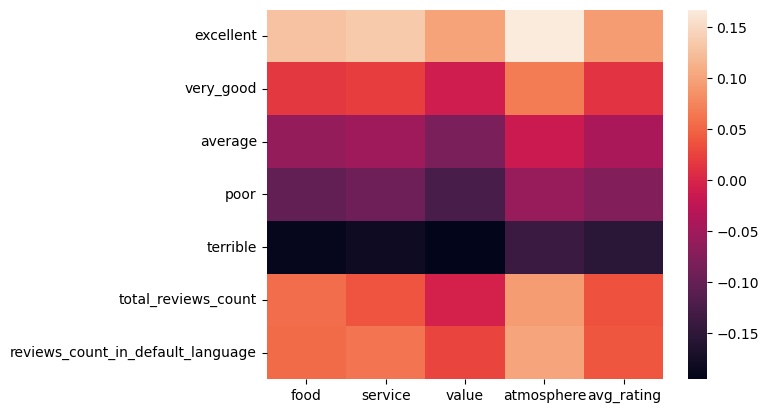

In [547]:
sns.heatmap(df_rev_rating.corr().iloc[:7,7:])

According to these results, the review columns are not correlated with the rating columns.

#### Are vegetarian-friendly restaurants better than non-vegetarian ones?

This question requests us to test whether there is a statistically significant rating difference between vegetarian and non-vegetarian restaurants. We will test this hypothesis by using independent samples t test.

First, let's see the number of vegetarian and non-vegetarian restaurants:

In [548]:
df_dataset["vegetarian_friendly"].value_counts(dropna=False)

N    759380
Y    324017
Name: vegetarian_friendly, dtype: int64

The percentage of vegetarian and non-vegetarian restaurants:

In [549]:
df_dataset["vegetarian_friendly"].value_counts(dropna=False, normalize=True)

N    0.700925
Y    0.299075
Name: vegetarian_friendly, dtype: float64

Mean values of average rating scores for vegetarian and non-vegetarian restaurants:

In [550]:
df_dataset.groupby("vegetarian_friendly").avg_rating.mean()

vegetarian_friendly
N    3.967643
Y    4.176086
Name: avg_rating, dtype: float64

Now, we will calculate the t statistics:

In [551]:
X1 = df_dataset[df_dataset["vegetarian_friendly"] == "N"].avg_rating
X2 = df_dataset[df_dataset["vegetarian_friendly"] == "Y"].avg_rating

In [552]:
# !pip install researchpy
import researchpy as rp
import scipy.stats as stats

summary, results = rp.ttest(group1= X1, group1_name= "Non-vegetarian",
                            group2= X2, group2_name= "Vegetarian")

pd.DataFrame(summary)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Non-vegetarian,663433.0,3.967643,0.803768,0.000987,3.965709,3.969577
1,Vegetarian,323328.0,4.176086,0.446865,0.000786,4.174546,4.177626
2,combined,986761.0,4.035943,0.713694,0.000718,4.034535,4.037351


According to the summary table above, mean rating score for vegetarian restaurans is 4.176086 and the mean rating score for non-vegetarian restaurants is 3.967643. This finding tells us that vegetarian restaurants have only slightly higher average rating scores than non-vegetarian restaurants.

The results table below shows that p-value = 0.000. It means that we reject that null hypothesis (there is no significant difference between two groups) because the average rating difference between vegetarian and non-vegetarian restaurants is statistically significant (i.e., p-value is smaller than 0.05). 

In [553]:
pd.DataFrame(results)

,Independent t-test,results
0,Difference (Non-vegetarian - Vegetarian) =,-0.2084
1,Degrees of freedom =,986759.0000
2,t =,-137.4700
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.2948
7,Hedge's g =,-0.2948
8,Glass's delta1 =,-0.2593
9,Point-Biserial r =,-0.1371


#### Are there any significantly more expensive cuisines?

In [554]:
df_dataset.cuisines.value_counts()

Italian                                                          53243
French                                                           39103
Cafe                                                             35009
Spanish                                                          27339
Italian, Pizza                                                   26998
                                                                 ...  
Italian, International, Mediterranean, Pizza, European               1
Italian, Bar, Pizza, Mediterranean, European, Gastropub              1
Italian, Mediterranean, Pizza, Wine Bar                              1
Grill, Fusion, Cafe, Spanish, Wine Bar                               1
French, American, Bar, International, European, Pub, Romanian        1
Name: cuisines, Length: 97741, dtype: int64

Some restaurants serve more than one cuisine. Therefore, it's not possible to compare which cuisine is more expensive than any one of the rest. As a result, we need to eliminate these restaurants from our analysis. Since majority of restaurants serve only one cuisine, there will not be much loss once we remove the restaurants that serve food from multiple cuisines. 

For this reason, we will first create a single_cuisine column and mark the multiple cuisines with NaN. 

In [555]:
df_dataset["single_cuisine"] = df_dataset.cuisines.str.contains(",")
df_dataset["single_cuisine"]

# restaurants with multiple cuisines have a comma (,) value

0          False
1            NaN
2           True
3          False
4          False
           ...  
1083392      NaN
1083393    False
1083394      NaN
1083395     True
1083396    False
Name: single_cuisine, Length: 1083397, dtype: object

In [556]:
df_dataset["single_cuisine"] = df_dataset["single_cuisine"].astype("string")

In [557]:
df_dataset["single_cuisine"] = df_dataset["single_cuisine"].replace("True", np.nan)
df_dataset["single_cuisine"]

# True values mean that the restaurant serve multiple cuisines.

0          False
1           <NA>
2           <NA>
3          False
4          False
           ...  
1083392     <NA>
1083393    False
1083394     <NA>
1083395     <NA>
1083396    False
Name: single_cuisine, Length: 1083397, dtype: string

In [558]:
df_dataset["single_cuisine"].value_counts()

False    286382
Name: single_cuisine, dtype: Int64

The False values above indicate that these restaurants serve food from only one cuisine.

In [559]:
df_cuisine_compare = df_dataset.dropna(subset='single_cuisine')

In [560]:
df_cuisine_compare.shape

(286382, 43)

There are 286382 rows of data on restaurants that serve food from only one cuisine.

In [561]:
df_cuisine_compare["cuisines"].value_counts()

Italian       53243
French        39103
Cafe          35009
Spanish       27339
Fast food     13803
              ...  
Slovenian         1
Ecuadorean        1
Sardinian         1
Calabrian         1
Albanian          1
Name: cuisines, Length: 138, dtype: int64

**Now, we have eliminated restaurants with multiple cuisines and there are only restaurants that serve food from a single cuisine**

There are two price columns in the dataset. However, unfortunately, neither "price_range" nor "price_level" are  reliable features to make an accurate comparison between different cuisines in terms of their price. In the last output below, it can be clearly seen that there is a mismatch between these two columns.

In [562]:
df_cuisine_compare.price_level.value_counts()

€€-€€€    120214
€          71261
€€€€        5463
Name: price_level, dtype: int64

In [476]:
df_cuisine_compare.price_range.value_counts()

€5-€15             1461
€5-€10             1197
€10-€30            1152
€10-€20            1139
€5-€20             1026
                   ... 
€115-€575             1
€17-€19               1
€15-€195              1
€1,682-€142,304       1
€1-€41                1
Name: price_range, Length: 3210, dtype: int64

In [577]:
df_cuisine_compare[["price_range","price_level"]].sample(30)

,price_range,price_level
87619,NaN,NaN
1039391,€1-€77,€€€€
143967,NaN,€€-€€€
56044,€8-€15,€€-€€€
5031,NaN,€
1035230,NaN,NaN
58218,NaN,NaN
479872,€2-€6,€
195455,NaN,NaN
570883,NaN,NaN


In order to answer the question whether there are any significantly more expensive cuisines, we need to create a reliable price benchmark to compare prices of different cuisines. For this reason, we will take the price_range column and take the higher value and record it as the highest price. Then, we will compare different cuisines' mean values of this new variable (highest_price). 

In [477]:
df_cuisine_compare["highest_price"] = df_cuisine_compare["price_range"].str.extract("-€(\d+)").replace(",",".").astype("float")
df_cuisine_compare["highest_price"]

0           NaN
3           NaN
4           NaN
5          29.0
10          NaN
           ... 
1083379     NaN
1083382     NaN
1083388     NaN
1083393     NaN
1083396     NaN
Name: highest_price, Length: 286382, dtype: float64

In [478]:
df_cuisine_compare.dropna(subset="highest_price", inplace=True)

In [479]:
df_cuisine_compare[["cuisines","highest_price"]]

,cuisines,highest_price
5,French,29.0
15,Pizza,30.0
20,French,23.0
29,French,40.0
41,French,20.0
...,...,...
1083314,European,2.0
1083321,Italian,4.0
1083323,Italian,20.0
1083341,Pizza,14.0


In [480]:
df_cuisine_compare.groupby("cuisines")["highest_price"].mean().sort_values(ascending=False).to_frame()

,highest_price
cuisines,
Central European,77.619048
Scandinavian,76.384615
Croatian,69.692308
Swedish,64.107143
Beijing cuisine,61.500000
...,...
Street Food,12.948649
Soups,10.313725
Ukrainian,8.000000


As we see in the dataframe above, some cuisines are significantly more expensive than other cuisines. For example, Central European cuisine's mean highest price is 77.619048, while Taiwainese cuisine's mean highest price is 7.000000. There is more than 10x price gap between Central European	and Taiwanese cuisines.

Likewise, we can compare top 25% and bottom 25% cuisines as well. 

**Top 25% price (most expensive) cuisines**

In [481]:
df_cuisine_compare.groupby("cuisines")["highest_price"].mean().sort_values(ascending=False).to_frame().head(32)

,highest_price
cuisines,
Central European,77.619048
Scandinavian,76.384615
Croatian,69.692308
Swedish,64.107143
Beijing cuisine,61.500000
Lombard,57.500000
Emilian,50.000000
Campania,50.000000
Chilean,49.250000


As we see below, top 25% most expensive cuisines' mean price is 44.284388.

In [482]:
Top25percent_cuisine_mean_score = df_cuisine_compare.groupby("cuisines")["highest_price"].mean().sort_values(ascending=False).to_frame().head(32).mean()
Top25percent_cuisine_mean_score

highest_price    44.284388
dtype: float64

However, the bottom 25% price (least expensive) cuisines' mean price is only 15.786838. 

In [483]:
least_expensive_cuisines = df_cuisine_compare.groupby("cuisines")["highest_price"].mean().sort_values(ascending=True).to_frame().head(32).mean()
least_expensive_cuisines

highest_price    15.786838
dtype: float64

As a result, "Yes, there are some cuisines that are significantly more expensive than others".

### Business-specific

#### In the assets directory, you will see a very small dataset called europe_capitals_population_and_area.csv. A gluten-free restaurant wants to open a new restaurant in a European capital where gluten-free restaurants are underrepresented. Assuming there are no other factors, except population and gluten-free restaurant density, what would be the top 5 capitals to open that restaurant?

In [484]:
df_restaurants = pd.read_csv("europe_capitals_population_and_area.csv", sep=";" )
df_restaurants.head(5)

,CityNo,City,Country,Population,Area in km2
0,1,Amsterdam,Netherland,851573,"219,32"
1,2,Athens,Greece,664046,2929
2,4,Barcelona,Spain,1620809,"101,4"
3,4,Berlin,Germany,3711930,"891,7"
4,5,Bratislava,Slovakia,424428,"367,6"


In [485]:
from skimpy import clean_columns

df_restaurants = clean_columns(df_restaurants)
df_restaurants.columns

5 column names have been cleaned

Index(['city_no', 'city', 'country', 'population', 'area_in_km_2'], dtype='object')

In [486]:
df_restaurants.head()

,city_no,city,country,population,area_in_km_2
0,1,Amsterdam,Netherland,851573,"219,32"
1,2,Athens,Greece,664046,2929
2,4,Barcelona,Spain,1620809,"101,4"
3,4,Berlin,Germany,3711930,"891,7"
4,5,Bratislava,Slovakia,424428,"367,6"


In [487]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city_no       31 non-null     int64 
 1   city          31 non-null     object
 2   country       31 non-null     object
 3   population    31 non-null     int64 
 4   area_in_km_2  31 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


The area column has wrong data type. Now, we will change it into integer data type:

In [488]:
df_restaurants.area_in_km_2 = df_restaurants.area_in_km_2.str.replace(",", ".").astype("float")
df_restaurants.area_in_km_2

0      219.32
1     2929.00
2      101.40
3      891.70
4      367.60
5      161.38
6      525.20
7       88.25
8      115.00
9      264.00
10      15.92
11     755.00
12     184.50
13     327.00
14     100.00
15     163.80
16     607.00
17    2586.40
18      47.87
19     604.30
20     181.76
21     310.43
22      41.42
23     454.00
24     105.40
25     298.00
26    1285.00
27     188.00
28     414.60
29     517.00
30      87.93
Name: area_in_km_2, dtype: float64

In [489]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city_no       31 non-null     int64  
 1   city          31 non-null     object 
 2   country       31 non-null     object 
 3   population    31 non-null     int64  
 4   area_in_km_2  31 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ KB


Now, we will merge df_restaurants dataset with df_dataset.

In [490]:
df_restaurants.rename(columns={'city': 'capital_city'},
          inplace=True, errors='raise')

In [491]:
df_restaurants.drop(columns="city_no", inplace=True)

In [492]:
df_restaurants.head(5)

,capital_city,country,population,area_in_km_2
0,Amsterdam,Netherland,851573,219.32
1,Athens,Greece,664046,2929.00
2,Barcelona,Spain,1620809,101.40
3,Berlin,Germany,3711930,891.70
4,Bratislava,Slovakia,424428,367.60


In [493]:
df_restaurants.shape

(31, 4)

In [494]:
df_dataset.shape

(1083397, 43)

In [495]:
pd.merge(df_dataset, df_restaurants, how="left", left_on="city", right_on="capital_city").shape

(1083397, 47)

In [496]:
df = pd.merge(df_dataset, df_restaurants, how="left", left_on="city", right_on="capital_city")
df.head(3).T

,0,1,2
restaurant_link,g10001637-d10002227,g10001637-d14975787,g10002858-d4586832
restaurant_name,Le 147,Le Saint Jouvent,Au Bout du Pont
original_location,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...","[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...","[""Europe"", ""France"", ""Centre-Val de Loire"", ""B..."
country_x,France,France,France
region,Nouvelle-Aquitaine,Nouvelle-Aquitaine,Centre-Val de Loire
province,Haute-Vienne,Haute-Vienne,Berry
city,Saint-Jouvent,Saint-Jouvent,Rivarennes
address,"10 Maison Neuve, 87510 Saint-Jouvent France","16 Place de l Eglise, 87510 Saint-Jouvent France","2 rue des Dames, 36800 Rivarennes France"
latitude,45.961674,45.95704,46.635895
longitude,1.169131,1.20548,1.386133


In [509]:
number_of_gluten_free_restaurants = df[df["gluten_free"]=="Y"].groupby("capital_city")["restaurant_name"].nunique().to_frame(name="number_of_restaurants").reset_index()
number_of_gluten_free_restaurants

,capital_city,number_of_restaurants
0,Amsterdam,607
1,Athens,270
2,Bratislava,66
3,Budapest,430
4,Copenhagen,245
5,Dublin,582
6,Helsinki,199
7,Lisbon,537
8,Lyon,54
9,Madrid,1359


In [510]:
capital_city_population = df_restaurants[df_restaurants.capital_city.isin(number_of_gluten_free_restaurants.capital_city)][["capital_city","population"]]
capital_city_population.reset_index(drop=True, inplace=True)

In [511]:
capital_city_population

,capital_city,population
0,Amsterdam,851573
1,Athens,664046
2,Bratislava,424428
3,Budapest,1779361
4,Copenhagen,602481
5,Dublin,527612
6,Helsinki,631695
7,Lisbon,504718
8,Lyon,506615
9,Madrid,3141991


In [512]:
df_population_density = pd.merge(capital_city_population, number_of_gluten_free_restaurants, on="capital_city")
df_population_density

,capital_city,population,number_of_restaurants
0,Amsterdam,851573,607
1,Athens,664046,270
2,Bratislava,424428,66
3,Budapest,1779361,430
4,Copenhagen,602481,245
5,Dublin,527612,582
6,Helsinki,631695,199
7,Lisbon,504718,537
8,Lyon,506615,54
9,Madrid,3141991,1359


In [517]:
df_population_density["gluten_free_restaurant_density"] = 100000 * df_population_density["number_of_restaurants"] / df_population_density["population"]
df_population_density.sort_values(by="gluten_free_restaurant_density", ascending=False).head(5)

,capital_city,population,number_of_restaurants,gluten_free_restaurant_density
5,Dublin,527612,582,110.308333
7,Lisbon,504718,537,106.396047
10,Milan,1370074,1134,82.769252
0,Amsterdam,851573,607,71.279855
14,Rome,2868782,1641,57.201976


**The above list is the top 5 gluten-free restaurant places among the European capitals.**

#### Think and propose a couple of other ways this dataset could be used to help businesses.

### Bonus

#### In the assets directory, you will see a file called paris_bounding_polygon.json. This contains a list of latitude and longitude coordinates that define a polygon that is considered to represent the Paris city area. For simplicity, we assume the population distribution is uniform in the Paris city area. An Italian restaurant wants to open a restaurant in Paris in a zone where there are the fewest Italian restaurants. What is the best location to open the restaurant (the answer can be a single point or a bounding box/polygonal region depending on the implementation)?


In [524]:
df = pd.read_json("paris_bounding_polygon.json")
df

,0,1
0,2.224169,48.853442
1,2.224161,48.853478
2,2.224143,48.853578
3,2.224135,48.853654
4,2.224129,48.853759
...,...,...
914,2.238144,48.850367
915,2.237800,48.850440
916,2.226361,48.852959
917,2.225560,48.853136


WE HAD A HOSPITAL EMERGENCY TODAY. THEREFORE, BY THE TIME I HAVE BEGUN WORKING ON THE FILE THERE WAS NOT MUCH TIME LEFT. UNFORTUNATELY, TOMORROW I WILL HAVE TO BE AT THE HOSPITAL AS WELL AND I WILL NOT BE ABLE TO CONTINUE TO ANSWER THE BONUS QUESTION. 

REGARDS,

OSMAN DOLU